In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools as it
import os

os.chdir("/Users/ramongonze/phd/courses/privacidade_ml/privacy-ml")

In [2]:
results_raw = pd.read_csv("experiment_results/attack_evaluation_results.csv")
results_raw

,dataset,dp_type,epsilon,utility_model,attack_model,attack_accuracy
0,adult,algorithm,0.1,logistic_regression,logistic_regression,0.040732
1,adult,algorithm,0.5,logistic_regression,logistic_regression,0.027752
2,adult,algorithm,1.0,logistic_regression,logistic_regression,0.035204
3,adult,algorithm,10.0,logistic_regression,logistic_regression,0.051170
4,adult,algorithm,20.0,logistic_regression,logistic_regression,0.109770
...,...,...,...,...,...,...
127,adult,output,1.0,naive_bayes,random_forest,0.194264
128,adult,output,10.0,naive_bayes,random_forest,0.308213
129,adult,output,20.0,naive_bayes,random_forest,0.308213
130,adult,output,50.0,naive_bayes,random_forest,0.308213


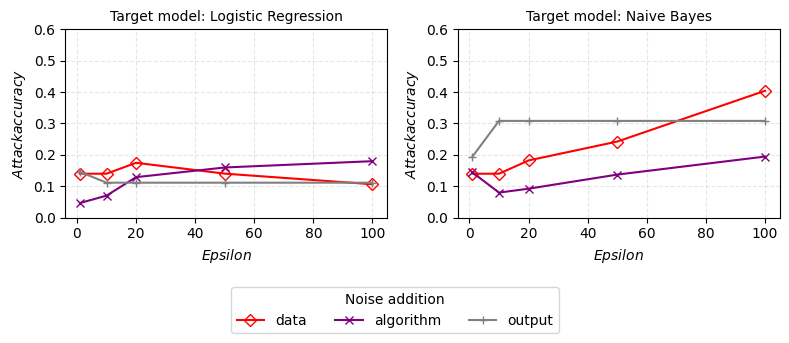

In [3]:
attack = "random_forest"
targets = ["logistic_regression", "naive_bayes"]

results = results_raw[(results_raw["epsilon"] != 0.1) & (results_raw["epsilon"] != 0.5)]
epsilons = [1, 10, 20, 50, 100]
markers = ["D", "x", "+"]
colors = ["red", "purple", "grey"]

# Create figure and axes
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

# Keep track of handles and labels only once
handles = []
labels = []

for i,target in enumerate(targets):
    for j,dp_type in enumerate(["data", "algorithm", "output"]):
        results_utility = results[
            (results["utility_model"] == target) &
            (results["attack_model"] == attack) &
            (results["dp_type"] == dp_type)
        ]

        acc = results_utility["attack_accuracy"] 
        line, = axs[i].plot(
            epsilons,
            acc,
            label=dp_type,
            color=colors[j],
            markevery=1,
            markersize=6,
            marker=markers[j],
            markerfacecolor='none',
            markeredgecolor=colors[j],
            markeredgewidth=1
        )
        
        # Collect legend info only once (first subplot)
        if i == 0:
            handles.append(line)
            labels.append(dp_type)

        axs[i].set_ylim((0,0.6))
        axs[i].grid(alpha=.3, linestyle="--")
        axs[i].set_xlabel("$Epsilon$")
        axs[i].set_ylabel("$Attack accuracy$")
    axs[i].set_title(f"Target model: {target.replace('_', ' ').title()}", fontsize=10)

# Create one global legend
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.15), title="Noise addition")
# fig.suptitle(f"Type of noise: {dp_type}")
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to accommodate legend
plt.show()

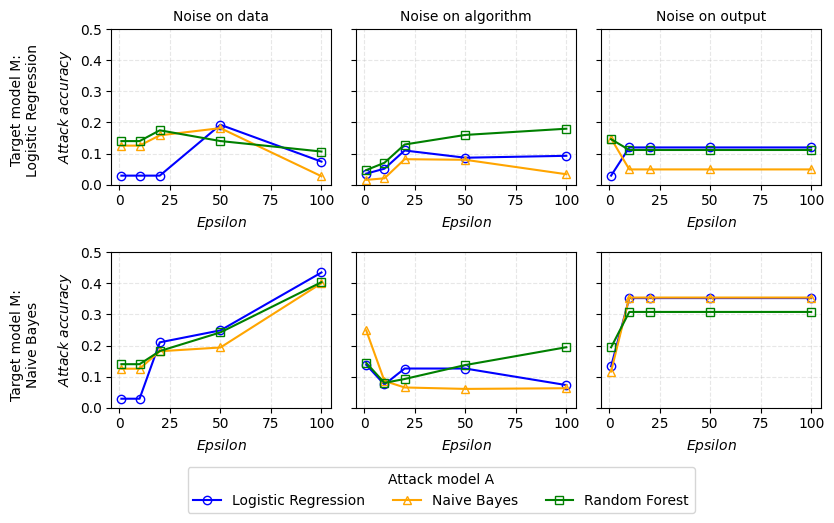

In [6]:
target = "logistic_regression"
ml_models = ["logistic_regression", "naive_bayes", "random_forest"]

results = results_raw[(results_raw["epsilon"] != 0.1) & (results_raw["epsilon"] != 0.5)]
epsilons = [1, 10, 20, 50, 100]
# results = results_raw
# epsilons = [0.1, 0.5, 1, 10, 50, 100]
markers = ["o", "^", "s"]
colors = ["blue", "orange", "green"]

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,5), sharey=True)

# Keep track of handles and labels only once
handles = []
labels = []

for i, target in enumerate(targets):
    targets = ["logistic_regression", "naive_bayes"]
    for j, dp_type in enumerate(["data", "algorithm", "output"]):
        for k, attack in enumerate(ml_models):
            results_utility = results[
                (results["utility_model"] == target) &
                (results["attack_model"] == attack) &
                (results["dp_type"] == dp_type)
            ]
            acc = results_utility["attack_accuracy"] 
            line, = axs[i,j].plot(
                epsilons,
                acc,
                label=attack.replace('_', ' ').title(),
                color=colors[k],
                markevery=1,
                markersize=6,
                marker=markers[k],
                markerfacecolor='none',
                markeredgecolor=colors[k],
                markeredgewidth=1
            )

            # Collect legend info only once (first subplot)
            if i == 0 and j == 0:
                handles.append(line)
                labels.append(attack.replace('_', ' ').title())

            axs[i,j].set_ylim((0,0.5))
            axs[i,j].grid(alpha=.3, linestyle="--")
            axs[i,j].set_xlabel("$Epsilon$")
            if j == 0:
                axs[i,j].set_ylabel("$Attack\ accuracy$")
            
            # if i == 0:
            #     axs[i,j].set_title(f"Target model: {target.replace('_', ' ').title()}", fontsize=10)

# Add column titles
for j, noise in enumerate(["data", "algorithm", "output"]):
    axs[0, j].set_title(f"Noise on {noise}", fontsize=10)

# Add row labels
for i, target in enumerate(targets):
    fig.text(-0.02, 0.77 if i == 0 else 0.30, f"Target model M:\n{target.replace('_', ' ').title()}",
             va='center', ha='center', rotation='vertical', fontsize=10)

# Create one global legend
fig.legend(handles, labels, loc='lower center', ncol=len(ml_models), bbox_to_anchor=(0.5, -0.05), title="Attack model A")
# fig.suptitle(f"Type of noise: {dp_type}")
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to accommodate legend
plt.show()


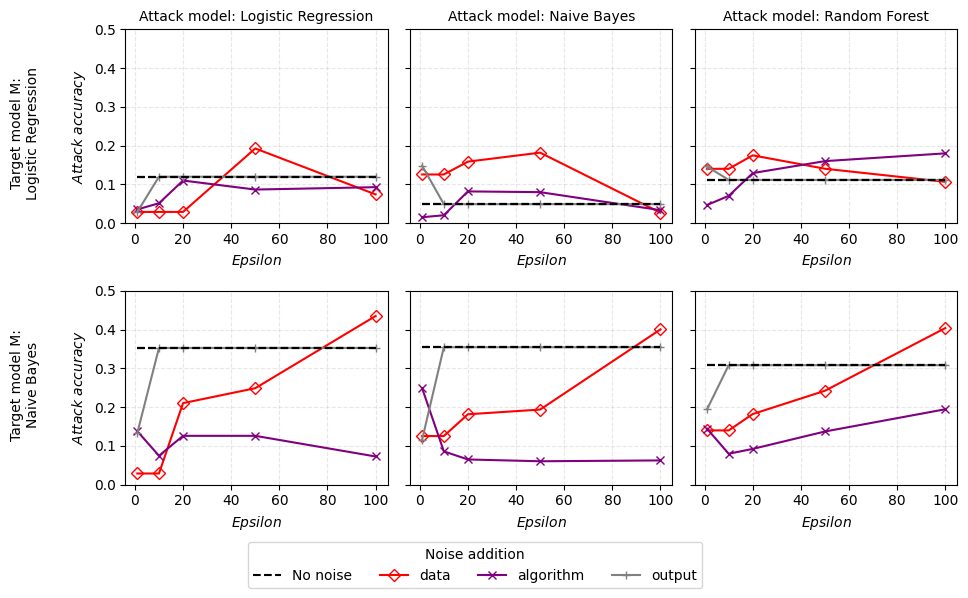

In [5]:
ml_models = ["logistic_regression", "naive_bayes", "random_forest"]

results = results_raw[(results_raw["epsilon"] != 0.1) & (results_raw["epsilon"] != 0.5)]
epsilons = [1, 10, 20, 50, 100]
# results = results_raw
# epsilons = [0.1, 0.5, 1, 10, 50, 100]
markers = ["D", "x", "+"]
colors = ["red", "purple", "grey"]

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,6), sharey=True)
# Keep track of handles and labels only once
handles = []
labels = []
targets = ["logistic_regression", "naive_bayes"]
for i, target in enumerate(targets):
    for j, attack in enumerate(ml_models):
        for k, dp_type in enumerate(["data", "algorithm", "output"]):
            results_utility = results[
                (results["utility_model"] == target) &
                (results["attack_model"] == attack) &
                (results["dp_type"] == dp_type)
            ]
            acc = results_utility["attack_accuracy"] 
            line, = axs[i,j].plot(
                epsilons,
                acc,
                label=dp_type,
                color=colors[k],
                markevery=1,
                markersize=6,
                marker=markers[k],
                markerfacecolor='none',
                markeredgecolor=colors[k],
                markeredgewidth=1
            )
            none = results[
                (results["utility_model"] == target) &
                (results["attack_model"] == attack) &
                (results["dp_type"] == "none")
            ]["attack_accuracy"]
            baseline = axs[i,j].hlines(
                none, 1, 100, linestyle="--", colors="black", label="No noise baseline"
            )

            # Collect legend info only once (first subplot)
            if i == 0 and j == 0:
                if k == 0:
                    handles.append(baseline)
                    labels.append("No noise")
                handles.append(line)
                labels.append(dp_type)

            axs[i,j].set_ylim((0,0.5))
            axs[i,j].grid(alpha=.3, linestyle="--")
            axs[i,j].set_xlabel("$Epsilon$")
            if j == 0:
                axs[i,j].set_ylabel("$Attack\ accuracy$")

# Add column titles
for j, attack in enumerate(ml_models):
    axs[0, j].set_title(f"Attack model: {attack.replace('_', ' ').title()}", fontsize=10)

# Add row labels
for i, target in enumerate(targets):
    fig.text(0.05, 0.77 if i == 0 else 0.35, f"Target model M:\n{target.replace('_', ' ').title()}",
             va='center', ha='center', rotation='vertical', fontsize=10)

# Global legend
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, 0), title="Noise addition")

plt.tight_layout(rect=[0.08, 0.08, 1, 1])  # Leave room for row labels and legend
plt.show()